In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(404290, 6)

In [19]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
217380,217380,28057,37791,Why is the northeast part of India called Seve...,Why is India called a subcontinent?,0
263588,263588,380162,306661,What is the best way to apply for jury duty?,How can you request jury duty?,1
59112,59112,103592,103593,How long will I take to recover from jaundice ?,How much time does it take to recover from jau...,1
228134,228134,149480,337140,How can I learn seo?,How do I learn SEO basic?,0
279741,279741,6494,186961,How can one overcome the fear of speaking in p...,How can I overcome my fear of public speaking?,1


In [21]:
df["question1"][279741]


'How can one overcome the fear of speaking in public?'

In [23]:
df["question2"][279741]

'How can I overcome my fear of public speaking?'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# removing missing values:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
print(df.is_duplicate.value_counts())
print(df.is_duplicate.value_counts()/df.is_duplicate.count()*100)


is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


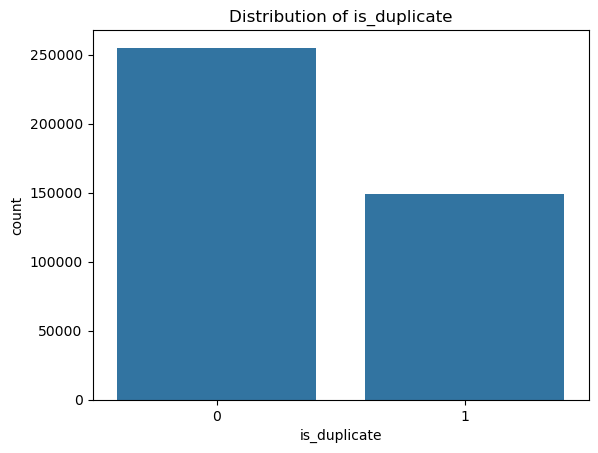

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_duplicate', data=df)
plt.title("Distribution of is_duplicate")
plt.show()

In [124]:
# To find repeated questions:
all_questions=pd.concat([df.question1,df.question2],ignore_index=True)

question_counts=all_questions.value_counts()

total_questions=all_questions.shape[0]

unique_questions=all_questions.nunique()

repeated_questions=(question_counts>1).sum()

question_appeared_once=(question_counts==1).sum()


print(f"Total questions in dataset: {total_questions}")
print(f"Total unique questions: {unique_questions}")
print(f"Questions that appeared only once: {question_appeared_once}")
print(f"Questions that appeared more than once: {repeated_questions}")

Total questions in dataset: 808574
Total unique questions: 537359
Questions that appeared only once: 425489
Questions that appeared more than once: 111870


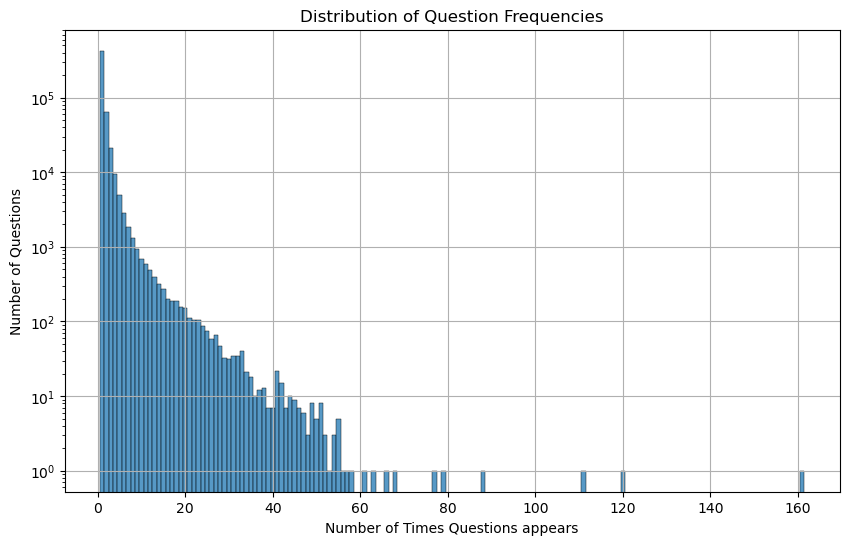

In [152]:
plt.figure(figsize=(10,6))
sns.histplot(x=question_counts, bins=160, discrete=True)
plt.title("Distribution of Question Frequencies")
plt.xlabel("Number of Times Questions appears")
plt.ylabel("Number of Questions")
plt.yscale('log')
plt.grid(True)

425489